# NE 204 Lab 3 Data Import

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

# general package imports
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# import Ba-133 cathode data as example

# Do NOT do timestamp cleaning import - we want multiple events with the same timestamp 
# because we are reading multiple electrodes at the same time

f_name = './data/cathode/ba133.h5'
f_data = h5py.File(f_name,'r')
pulses = f_data['raw_data'][()]
events = f_data['event_data'][()]
print(str(test.shape[0])+' events')

34596 events


In [10]:
# load data into df for cleaning
df = pd.DataFrame(events)

In [12]:
df.head(5)

,rid,det,timestamp,adc_max,adc_argmax,pileup,gate1,gate2,gate3,gate4,gate5,gate6
0,0,0,458661,8607,39,0,437310,0,8572,8572,8572,8572
1,1,0,528724,8522,11,0,432990,0,8494,8494,8494,8494
2,2,0,687781,8416,22,0,427723,0,8360,8360,8360,8360
3,3,0,781678,8466,49,0,430310,0,8428,8428,8428,8428
4,4,0,1083787,8619,97,0,436622,0,8546,8546,8546,8546


In [13]:
# the 'det' field corresponds to channel of data
df['det'].unique()

array([ 0,  2,  4,  6,  8, 10, 12, 13, 14], dtype=uint8)

In [90]:
# separate events by electrode
# 0 = cathode, 2-14 = anodes
# see anode mapping below
cathode = df[df['det'] == 0]
anode2 = df[df['det'] == 2]
anode3 = df[df['det'] == 4]
anode4 = df[df['det'] == 6]
anode5 = df[df['det'] == 8]
anode6 = df[df['det'] == 10]
anode7 = df[df['det'] == 12]
anode8 = df[df['det'] == 13]
anode9 = df[df['det'] == 14]

In [91]:
# check all same length
print(len(cathode))
print(len(anode2))
print(len(anode3))
print(len(anode4))
print(len(anode5))
print(len(anode6))
print(len(anode7))
print(len(anode8))
print(len(anode9))
# they aren't the same in this case, so further cleaning necessary

27505
27505
27505
27505
27505
27505
27505
27504
27505


In [92]:
# find where misalignment occurs
np.argwhere(anode8['timestamp'].to_numpy() != anode9['timestamp'].to_numpy()[:-1])[0]

array([324])

In [93]:
anode9.iloc[323]['timestamp'] == anode8.iloc[323]['timestamp']

True

In [94]:
anode9.iloc[324]['timestamp'] == anode8.iloc[324]['timestamp']

False

In [95]:
anode9.iloc[325]['timestamp'] == anode8.iloc[324]['timestamp']

True

In [96]:
# need to delete index 324 for all electrodes besides anode 8 
cathode = cathode.drop(labels=cathode.index[324],axis=0)
anode2 = anode2.drop(labels=anode2.index[324],axis=0)
anode3 = anode3.drop(labels=anode3.index[324],axis=0)
anode4 = anode4.drop(labels=anode4.index[324],axis=0)
anode5 = anode5.drop(labels=anode5.index[324],axis=0)
anode6 = anode6.drop(labels=anode6.index[324],axis=0)
anode7 = anode7.drop(labels=anode7.index[324],axis=0)
anode9 = anode9.drop(labels=anode9.index[324],axis=0)

In [97]:
# check all same length again
print(len(cathode))
print(len(anode2))
print(len(anode3))
print(len(anode4))
print(len(anode5))
print(len(anode6))
print(len(anode7))
print(len(anode8))
print(len(anode9))

27504
27504
27504
27504
27504
27504
27504
27504
27504


In [98]:
# looks good now
# grab indices of event to get pulses
c_i = cathode['rid'].to_numpy()
a2_i = anode2['rid'].to_numpy()
a3_i = anode3['rid'].to_numpy()
a4_i = anode4['rid'].to_numpy()
a5_i = anode5['rid'].to_numpy()
a6_i = anode6['rid'].to_numpy()
a7_i = anode7['rid'].to_numpy()
a8_i = anode8['rid'].to_numpy()
a9_i = anode9['rid'].to_numpy()

In [99]:
# grab pulses
c = pulses[c_i]
a2 = pulses[a2_i]
a3 = pulses[a3_i]
a4 = pulses[a4_i]
a5 = pulses[a5_i]
a6 = pulses[a6_i]
a7 = pulses[a7_i]
a8 = pulses[a8_i]
a9 = pulses[a9_i]

<IPython.core.display.Javascript object>


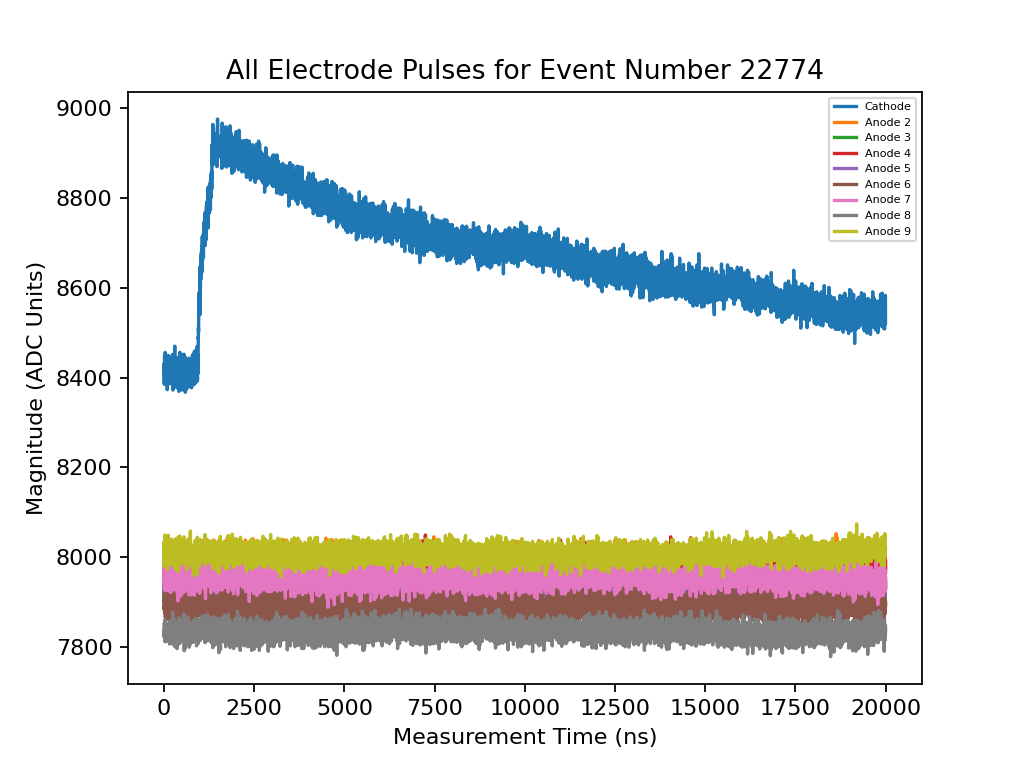

In [100]:
# plot all electrodes for random pulse
pulse_num = int(np.random.rand()*len(a2))
# pulse_num = 0 # or pick specific pulse
transparency = 1

plt.figure()
plt.plot(c[pulse_num],label='Cathode',alpha=transparency)
plt.plot(a2[pulse_num],label='Anode 2',alpha=transparency)
plt.plot(a3[pulse_num],label='Anode 3',alpha=transparency)
plt.plot(a4[pulse_num],label='Anode 4',alpha=transparency)
plt.plot(a5[pulse_num],label='Anode 5',alpha=transparency)
plt.plot(a6[pulse_num],label='Anode 6',alpha=transparency)
plt.plot(a7[pulse_num],label='Anode 7',alpha=transparency)
plt.plot(a8[pulse_num],label='Anode 8',alpha=transparency)
plt.plot(a9[pulse_num],label='Anode 9',alpha=transparency)

# plt.plot(wave_times,
#          a1[pulse_num]+a2[pulse_num]+a3[pulse_num]+a4[pulse_num]+a5[pulse_num]+a6[pulse_num]+a7[pulse_num]+a8[pulse_num],
#         label='Summed Anode')
plt.title('All Electrode Pulses for Event Number '+str(pulse_num))
plt.xlabel('Measurement Time (ns)')
plt.ylabel('Magnitude (ADC Units)')
plt.legend(fontsize=5)
plt.show()

In [102]:
import h5py
import pandas as pd
import numpy as np

def import_czt_data(f_name):
    '''
    Function to import CZT data and split into electrodes
    
    Would probably be better to make this a class but this works for now
    
    Parameters
    ----------
    f_name: str
        path to file
    
    Returns
    -------
    c: ndarray
        cathode pulses
    a2: ndarray
        anode 2 pulses
    a3: ndarray
        anode 3 pulses
    a4: ndarray
        anode 4 pulses
    a5: ndarray
        anode 5 pulses
    a6: ndarray
        anode 6 pulses
    a7: ndarray
        anode 7 pulses
    a8: ndarray
        anode 8 pulses
    a9: ndarray
        anode 9 pulses
    '''
    # load file with h5py
    f_data = h5py.File(f_name,'r')
    
    # extract pulse and event data
    pulses = f_data['raw_data'][()]
    events = f_data['event_data'][()]
    
    # load into pandas df
    df = pd.DataFrame(events)
    
    # grab data for each electrode from event data    
    cathode = df[df['det'] == 0]
    anode2 = df[df['det'] == 2]
    anode3 = df[df['det'] == 4]
    anode4 = df[df['det'] == 6]
    anode5 = df[df['det'] == 8]
    anode6 = df[df['det'] == 10]
    anode7 = df[df['det'] == 12]
    anode8 = df[df['det'] == 13]
    anode9 = df[df['det'] == 14]
    
    assert len(cathode) == len(anode2) == len(anode3) == len(anode4) == len(anode5) == len(anode6) == len(anode7) == len(anode8) == len(anode9), 'Data lengths do not match - cleaning required'

    # grab event id for each electrode    
    c_i = cathode['rid'].to_numpy()
    a2_i = anode2['rid'].to_numpy()
    a3_i = anode3['rid'].to_numpy()
    a4_i = anode4['rid'].to_numpy()
    a5_i = anode5['rid'].to_numpy()
    a6_i = anode6['rid'].to_numpy()
    a7_i = anode7['rid'].to_numpy()
    a8_i = anode8['rid'].to_numpy()
    a9_i = anode9['rid'].to_numpy()
    
    # grab pulses
    c = pulses[c_i]
    a2 = pulses[a2_i]
    a3 = pulses[a3_i]
    a4 = pulses[a4_i]
    a5 = pulses[a5_i]
    a6 = pulses[a6_i]
    a7 = pulses[a7_i]
    a8 = pulses[a8_i]
    a9 = pulses[a9_i]
    
    return c, a2, a3, a4, a5, a6, a7, a8, a9

In [104]:
# test function
f_name = './data/cathode/cs137.h5'
c, a2, a3, a4, a5, a6, a7, a8, a9 = import_czt_data(f_name)

<IPython.core.display.Javascript object>


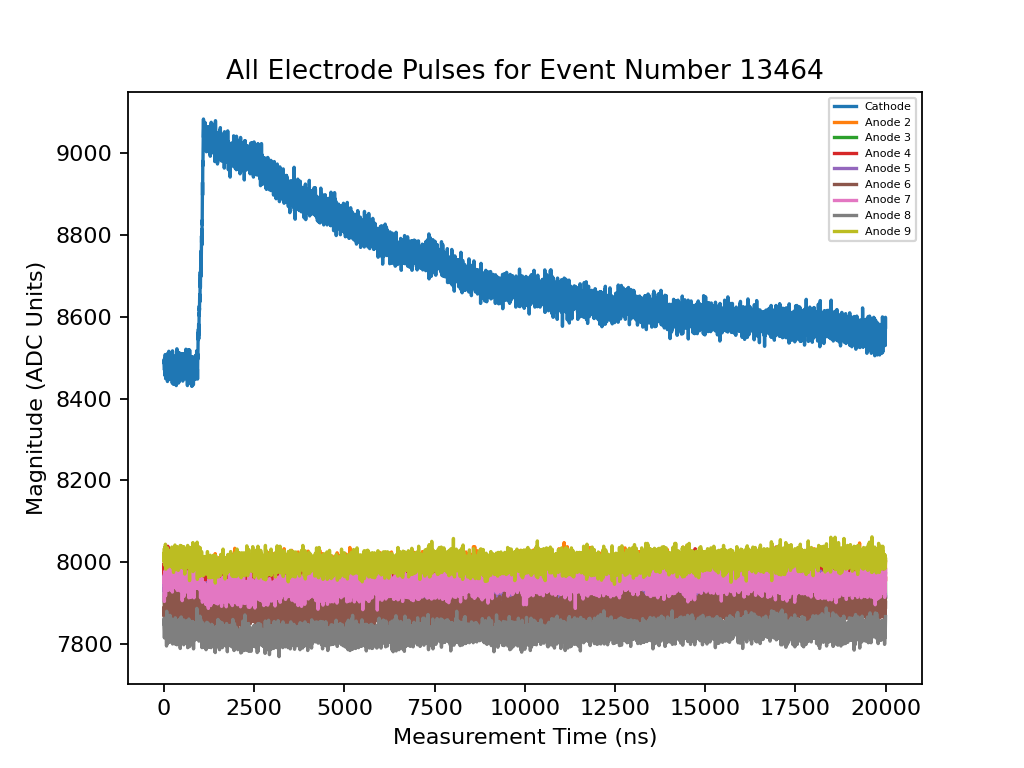

In [105]:
# plot all electrodes for random pulse
pulse_num = int(np.random.rand()*len(a2))
# pulse_num = 0 # or pick specific pulse
transparency = 1

plt.figure()
plt.plot(c[pulse_num],label='Cathode',alpha=transparency)
plt.plot(a2[pulse_num],label='Anode 2',alpha=transparency)
plt.plot(a3[pulse_num],label='Anode 3',alpha=transparency)
plt.plot(a4[pulse_num],label='Anode 4',alpha=transparency)
plt.plot(a5[pulse_num],label='Anode 5',alpha=transparency)
plt.plot(a6[pulse_num],label='Anode 6',alpha=transparency)
plt.plot(a7[pulse_num],label='Anode 7',alpha=transparency)
plt.plot(a8[pulse_num],label='Anode 8',alpha=transparency)
plt.plot(a9[pulse_num],label='Anode 9',alpha=transparency)

# plt.plot(wave_times,
#          a1[pulse_num]+a2[pulse_num]+a3[pulse_num]+a4[pulse_num]+a5[pulse_num]+a6[pulse_num]+a7[pulse_num]+a8[pulse_num],
#         label='Summed Anode')
plt.title('All Electrode Pulses for Event Number '+str(pulse_num))
plt.xlabel('Measurement Time (ns)')
plt.ylabel('Magnitude (ADC Units)')
plt.legend(fontsize=5)
plt.show()